In [189]:
import cv2 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [255]:
# capture frames from a video 
# replace the file name string with your file path
#filename = 'D:/Coursework/ENCE 688V/Projects/Project II/Source Code/surveillance.m4v'
filename = 'Cars.mp4'

cap = cv2.VideoCapture(filename) 
  
# Trained XML classifiers describes some features of some object we want to detect 
# see https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
# note that this file can be modified with any text editor such as VSCode, Notepad
car_cascade = cv2.CascadeClassifier('cars_3.xml') 

In [256]:
    ret, frames = cap.read() 

    # convert to gray scale of each frames 
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY) 
    cars = car_cascade.detectMultiScale(gray, 1.1, 1) 
    blur = cv2.GaussianBlur(gray,(5,5),0)
    cars_1 = car_cascade.detectMultiScale(blur, 1.1, 1)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    cars_2 = car_cascade.detectMultiScale(dilated, 1.1, 1)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
    cars_3 = car_cascade.detectMultiScale(closing, 1.1, 1)


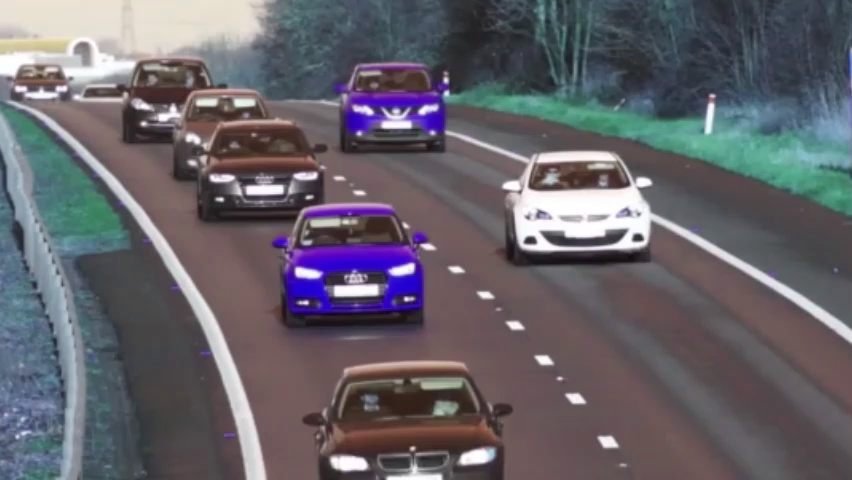

In [204]:
Image.fromarray(frames)

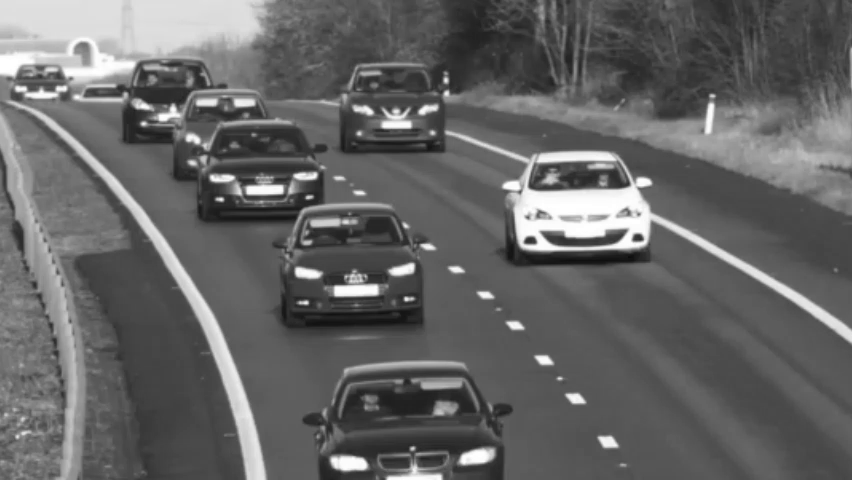

In [206]:
Image.fromarray(gray)

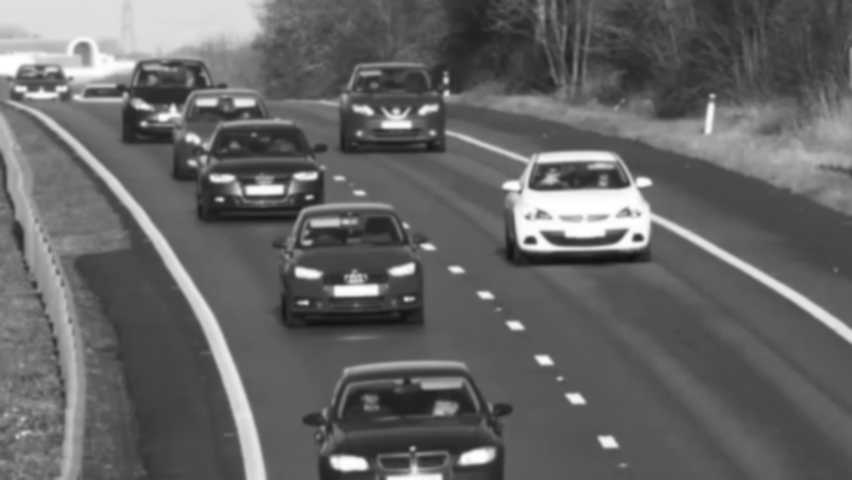

In [207]:
Image.fromarray(blur)

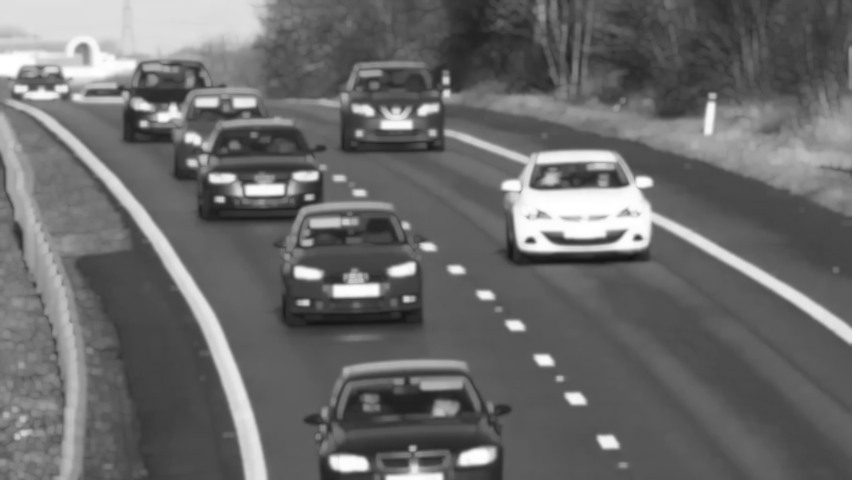

In [208]:
Image.fromarray(dilated)

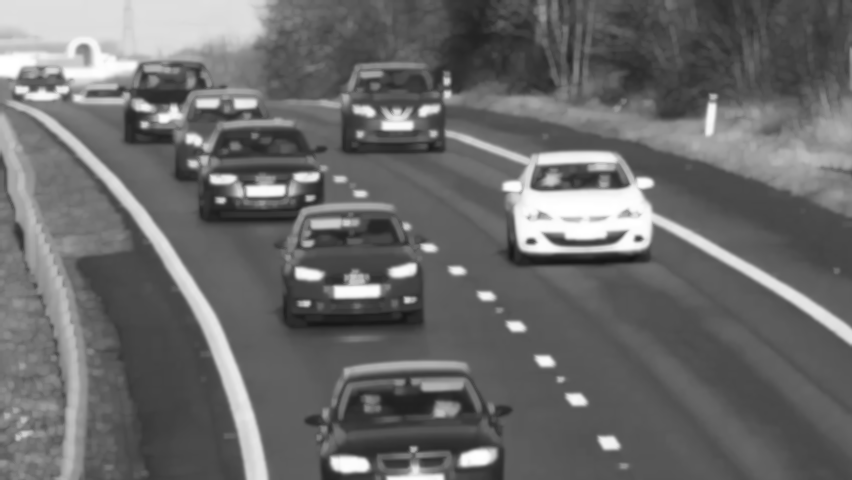

In [209]:
Image.fromarray(closing)

In [260]:
video = cv2.VideoWriter(
    'CarDetectionResult.avi',cv2.VideoWriter_fourcc(*'MJPG'), 30, (852,480)) 

In [ ]:
# counter of vehicles
counter = 0
# loop runs if capturing has been initialized. 
while True: 
    # step 2 -----------------------------------------------
    # read a frame from the video 
    ret, frames = cap.read() 

    # convert to gray scale of each frames 
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY) 
    
    # step 3-----------------------------------------------
    # detection algorithm
    # Detects cars of different sizes in the input image 
    cars = car_cascade.detectMultiScale(gray, 1.1, 1) 
    blur = cv2.GaussianBlur(gray,(5,5),0)
    cars_1 = car_cascade.detectMultiScale(blur, 1.1, 1)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    cars_2 = car_cascade.detectMultiScale(dilated, 1.1, 1)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
    cars_3 = car_cascade.detectMultiScale(closing, 1.1, 2)
    # To draw a rectangle in each cars 
    # we may also save the recognized cars into a csv/text file for offline post-processing
    # x,y are coordinates, w,h are width and height, respectively
    line_y = 360
    cnt = 0
    for (x,y,w,h) in cars_3: 
        # draw a rectangle top-left corner (x,y) and bottom-right corner (x+w, y+h) of rectangle
        # see https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html
        cv2.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2) 
        cnt += 1
        
        if line_y-2<y+h/2<line_y+2:
            counter+=1       

    
    # add more conditions, such as lane
    
    # draw lane or virtual loop
    
    # step4 ----------------------------------------------
    # draw text to display the number of counts
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # org 
    org = (50, 50) 

    # fontScale 
    fontScale = 1

    # blue color in BGR 
    color = (255, 0, 0) 

    # line thickness of 2 px 
    thickness = 2

    # Using cv2.putText() method to draw 
    # see https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
    text = 'total vehs crossed: ' + str(counter) + ', num vehs in the frame:' + str(cnt)
    frames = cv2.putText(frames, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    
    # draw the line
    frames = cv2.line(frames, (0,line_y), (852,line_y), (255,0,0),1)
    video.write(frames)  

    # step 5-------------------------------------------------
    # Display frames in a window called video1
    cv2.imshow('video1', frames) 
    
    # Wait for Esc key to stop 
    # 27 is the key code of Esc, 33 is the waiting duration in milliseconds
    if cv2.waitKey(33) == 27: 
        break
        
video.release()
# De-allocate any associated memory usage 
cv2.destroyAllWindows() 